In [ ]:
import numpy as np                     # numeric python lib

import matplotlib.image as mpimg       # reading images to numpy arrays
import matplotlib.pyplot as plt        # to plot any graph
import matplotlib.patches as mpatches  # to draw a circle at the mean contour

from skimage import measure            # to find shape contour
import scipy.ndimage as ndi            # to determine shape centrality


# matplotlib setup
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)      # setting default size of plots

In [ ]:
!wget https://www.dropbox.com/s/9019cpkapt5zm4w/Pic_OralCancer.rar?dl=0

--2023-02-17 06:37:31--  https://www.dropbox.com/s/9019cpkapt5zm4w/Pic_OralCancer.rar?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/9019cpkapt5zm4w/Pic_OralCancer.rar [following]
--2023-02-17 06:37:31--  https://www.dropbox.com/s/raw/9019cpkapt5zm4w/Pic_OralCancer.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc99e3a5d7cba591bfe7b9de832e.dl.dropboxusercontent.com/cd/0/inline/B2oqIt3NZn5SGR3lu4oEtdxDPdY0ePBPptnx2DRFk6P7eCeqHaqqknqHDSY3U1QFrhV-dSkhFYPwAIBuR9VzyFdFFmkZ1wFYKUfd9tEp6OE5acqcaY73L4ndcFy2X1vfZ2kBY5fz7ylwBG5jTsqD2hlSdzSZezu6dgiLRZG-yN7tTw/file# [following]
--2023-02-17 06:37:31--  https://uc99e3a5d7cba591bfe7b9de832e.dl.dropboxusercontent.com/cd/0/inline/B2oqIt3NZn5SGR3lu4oEtdxDPdY0ePBPptnx2DRFk6P7eCeqHaqqknqHD

In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive("/content/Pic_OralCancer.rar?dl=0")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
patool: Extracting /content/Pic_OralCancer.rar?dl=0 ...
patool: running /usr/bin/unrar x -- /content/Pic_OralCancer.rar?dl=0
patool:     with cwd='./Unpack_ig2e3jlg'
patool: ... /content/Pic_OralCancer.rar?dl=0 extracted to `Pic_OralCancer1' (local file exists).


'Pic_OralCancer1'

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage.filters import threshold_local
from PIL import Image

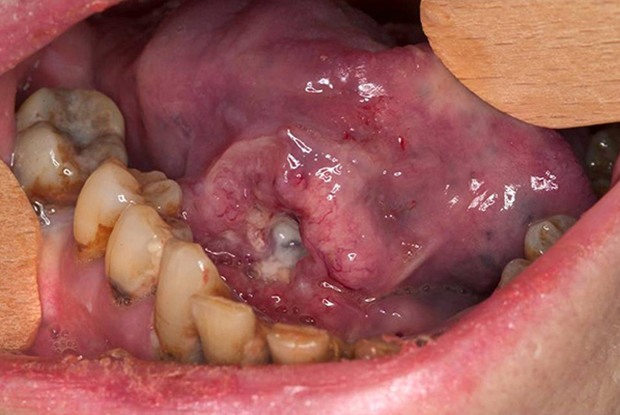

In [ ]:
file_name = '/content/Pic_OralCancer/cancer/dataset_Carcinomaoftherighttongue_OCT-20161108085557163.jpg'
img = Image.open(file_name)
img.thumbnail((800,800), Image.ANTIALIAS)
img

In [ ]:
def opencv_resize(image, ratio):
    width = int(image.shape[1] * ratio)
    height = int(image.shape[0] * ratio)
    dim = (width, height)
    return cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

In [ ]:
def plot_rgb(image):
    plt.figure(figsize=(16,10))zx
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

In [ ]:
image = cv2.imread(file_name)
resize_ratio = 500 / image.shape[0]
original = image.copy()
image = opencv_resize(image, resize_ratio)

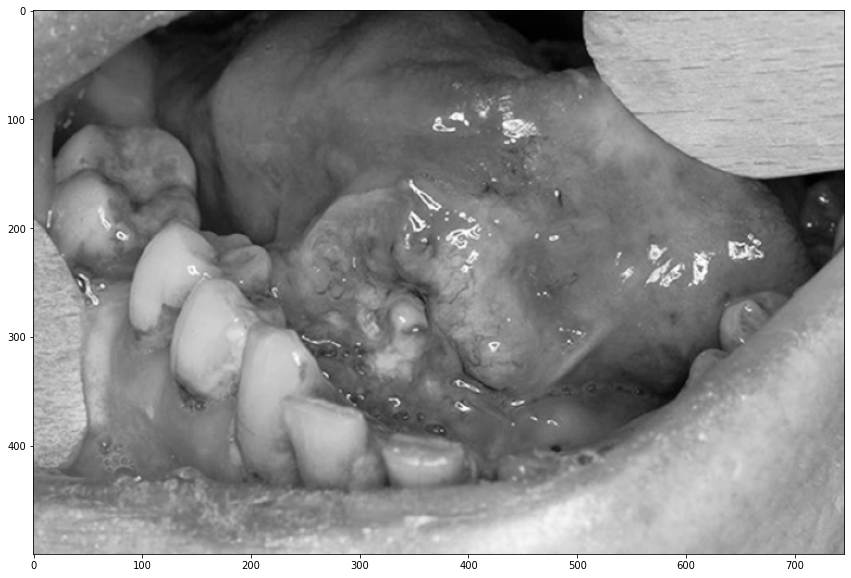

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_gray(gray)

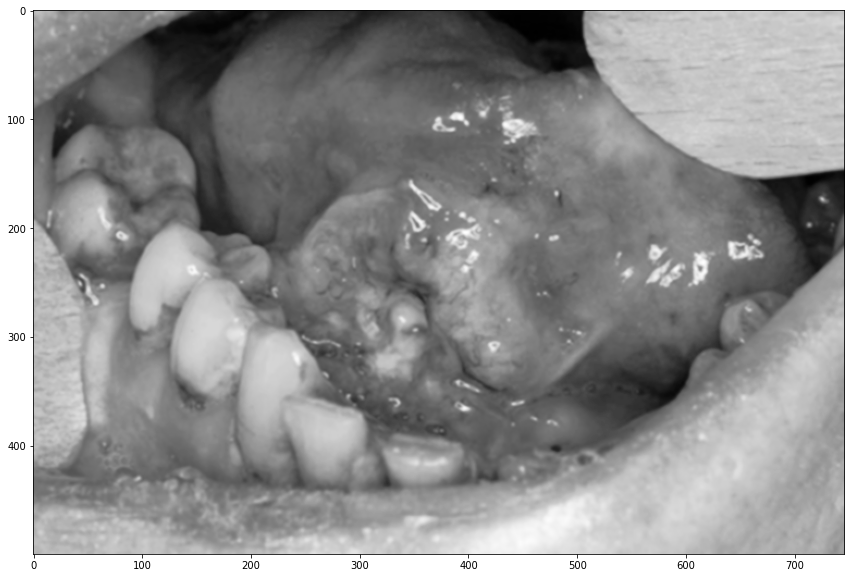

In [ ]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plot_gray(blurred)

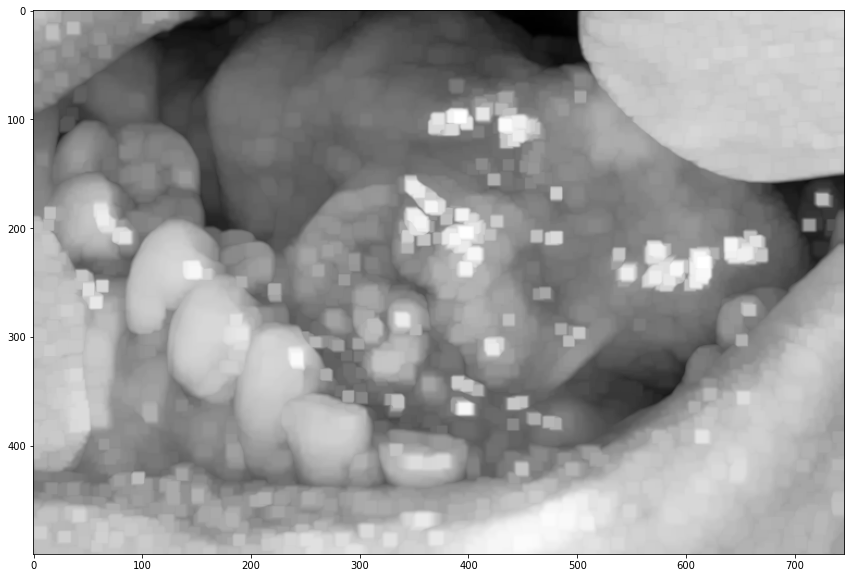

In [ ]:
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
dilated = cv2.dilate(blurred, rectKernel)
plot_gray(dilated)

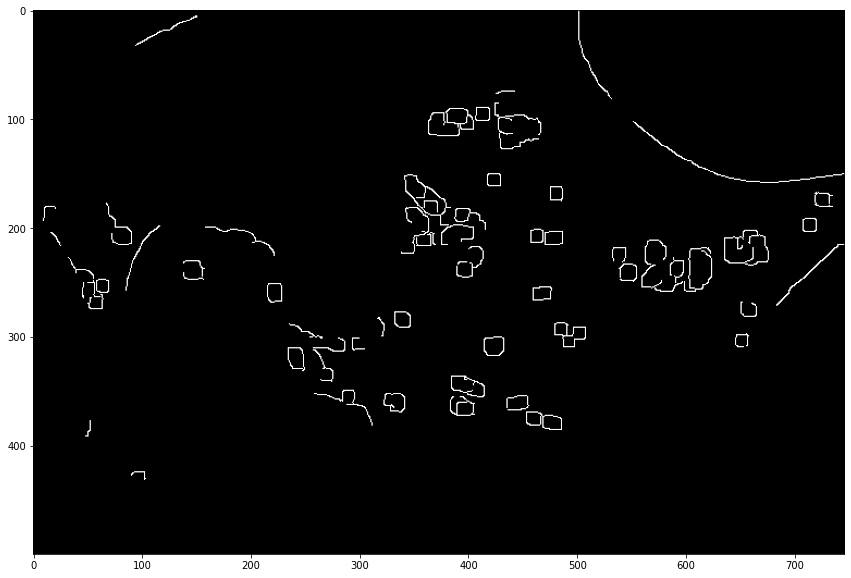

In [ ]:
edged = cv2.Canny(dilated, 100, 200, apertureSize=3)
plot_gray(edged)

In [ ]:
cv2.__version__

'4.6.0'

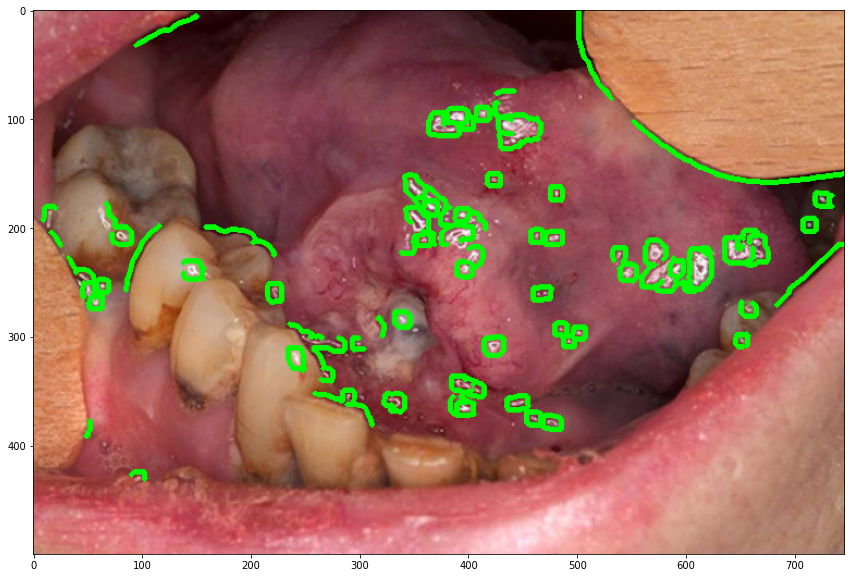

In [ ]:
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0,255,0), 3)
plot_rgb(image_with_contours)